# Використання Pandas для аналізу даних
**Мета:** Вивчення основних функцій Pandas для аналізу даних.

In [34]:
N = 7 % 5 + 1
print("Variant", N)

Variant 3


In [2]:
import pandas as pd

df = pd.read_csv(r'NationalNames.csv')
df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


1. Перші 8 рядків набору даних.

In [ ]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


2. Останні 8 рядків набору даних.

In [ ]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


4. Загальна інформація про дані у наборі даних.

In [ ]:
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


5. Кількість унікальних імен у наборі даних

In [ ]:
df['Name'].nunique()

93889

6. Кількість унікальних жіночих та чоловічих імен у цілому наборі даних


In [ ]:
df.groupby('Gender')['Name'].nunique()

,Name
Gender,
F,64911
M,39199


7. 5 найпопулярніших чоловічих імен у 2010 році


In [ ]:
df.loc[(df['Gender'] == 'M') & (df['Year'] == 2010)].sort_values('Count', ascending=False)[:5]

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


8. Найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)

In [35]:
result = df[df['Year'] == 1947].sort_values('Count', ascending=False)[:1]
print("The name is '{0}' in {1}".format(result['Name'].values[0], result['Year'].values[0]))

The name is 'Linda' in 1947


9. Кількість записів, для яких Count - мінімальне у наборі.

In [37]:
len(df[df['Count'] == min(df['Count'])])

254615

10. Кількість унікальних імен у кожному році

In [ ]:
df.groupby('Year')['Name'].nunique()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


11. Рік із найбільшою кількістю унікальних імен

In [ ]:
df.groupby('Year').agg({'Name': 'nunique'}).sort_values('Name', ascending=False)[:1]

,Name
Year,
2008,32488


12. Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [41]:
year = df.groupby('Year').agg({'Name': 'nunique'}).sort_values('Name', ascending=False)[:1].index[0]
df[df['Year'] == year].sort_values('Count', ascending=False)[:1].values[0][1]

'Jacob'

18. Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків


In [45]:
grouped = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
(grouped['F'] > grouped['M']).sum()

54

19. Графік загальної кількості народжень хлопчиків та дівчаток на
рік


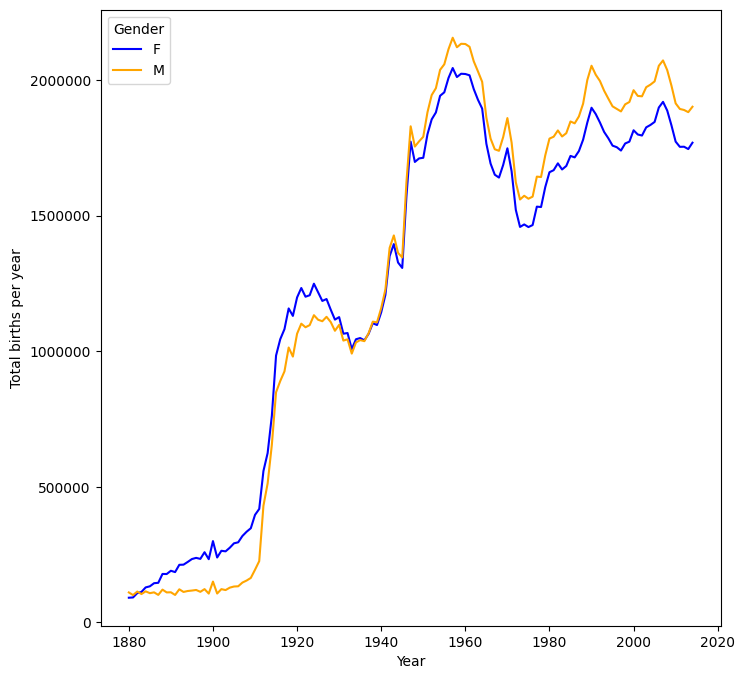

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8), dpi=100)

plt.xlabel("Year")
plt.ylabel("Total births per year")

xpoints = df['Year'].unique()
plt.plot(xpoints, grouped['F'].values, linestyle = 'solid', color = 'blue', label='F')
plt.plot(xpoints, grouped['M'].values, linestyle = 'solid', color = 'orange', label='M')
plt.ticklabel_format(style='plain')

plt.legend(title="Gender")

plt.show()

20. Кількість гендерно нейтральних імен (однакових для дівчат та
хлопців)


In [52]:
gender_counts = df.groupby('Name')['Gender'].nunique().reset_index()
len(gender_counts[gender_counts['Gender'] == 2])

10221

21. Кількість разів коли хлопчиків називали Barbara

In [ ]:
df[(df['Gender'] == 'M') & (df['Name'] == 'Barbara')]['Count'].sum()

4139

23. Найпопулярніші гендерно-нейтральні імена (ті, що присутні
кожного року)

In [58]:
gender_counts = df.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
count_of_years_with_2 = gender_counts[gender_counts['Gender'] == 2]

name_occurrences = count_of_years_with_2.groupby('Name').size().reset_index(name='Count_Of_Years_With_2')
result = name_occurrences[name_occurrences['Count_Of_Years_With_2'] == df['Year'].nunique()]

count_sum = df.groupby('Name')['Count'].sum().reset_index()
result_with_count = result.merge(count_sum, on='Name', how='left')
result_sorted = result_with_count.sort_values(by='Count', ascending = False)
result_sorted.reset_index()['Name']

,Name
0,James
1,John
2,Robert
3,William
4,Joseph
5,Jean
6,Jesse
7,Leslie
8,Francis
9,Lee


25. Графік розподілення кількості імен John та Mary по роках
без залежності до статі

In [ ]:
number_of_times_j = df[df['Name'] == 'John'].groupby('Year')['Count'].sum()
number_of_times_m = df[df['Name'] == 'Mary'].groupby('Year')['Count'].sum()


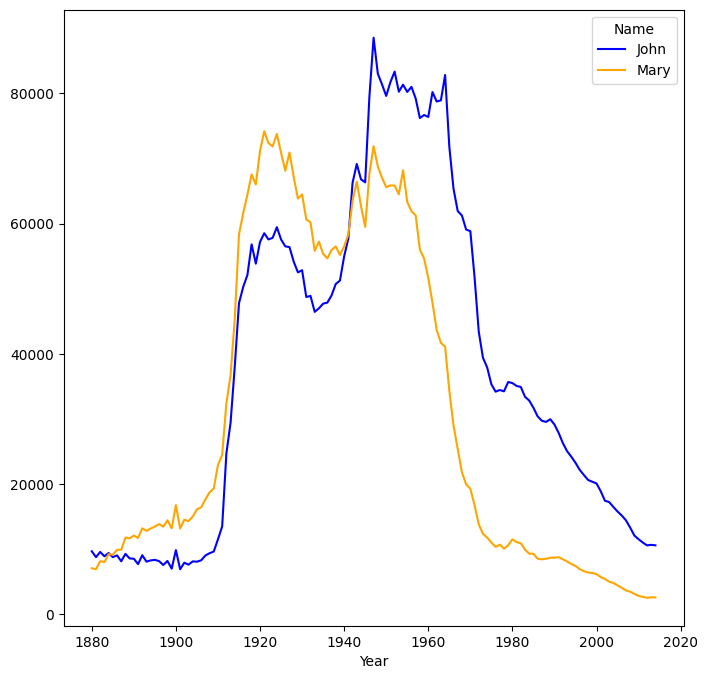

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8), dpi=100)

plt.xlabel("Year")

xpoints = df['Year'].unique()
plt.plot(xpoints, number_of_times_j.values, linestyle = 'solid', color = 'blue', label='John')
plt.plot(xpoints, number_of_times_m.values, linestyle = 'solid', color = 'orange', label='Mary')
plt.ticklabel_format(style='plain')

plt.legend(title="Name")

plt.show()

27. Найпопулярніші імена в кожному році

In [60]:
def get_most_popular_name(df):
    res = df.loc[df['Count'].idxmax()]
    return res[['Name', 'Count']]

df.groupby('Year').apply(get_most_popular_name)

<ipython-input-60-bcfa1380b560>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Year').apply(get_most_popular_name)


,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
